# Step 1: Load the Dataset

In [1]:
import pandas as pd 
df=pd.read_csv("raw_car_dataset.csv")
df.head()

,CarID,Brand,Model,Year,Price,Mileage,Fuel,Color,Owner,Location
0,1,NaN,Corolla,2012.0,50000.0,60000.0,NaN,Red,Third,Miami
1,2,Tesla,Corolla,NaN,25000.0,30000.0,Hybrid,Gray,NaN,NaN
2,3,Honda,Model S,2018.0,40000.0,45000.0,Diesel,Red,NaN,NaN
3,4,NaN,Mustang,2012.0,NaN,NaN,Petrol,White,Second,Houston
4,5,BMW,Civic,2015.0,20000.0,75000.0,Petrol,White,First,Los Angeles


# Step 2: Understand the Dataset Structure

In [2]:
# Check the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Display column names
print("Column names:", df.columns)


Number of rows: 52000
Number of columns: 10
Column names: Index(['CarID', 'Brand', 'Model', 'Year', 'Price', 'Mileage', 'Fuel', 'Color',
       'Owner', 'Location'],
      dtype='object')


# Step 3: Identify Missing Values

In [3]:
# Check for missing values in each column
missing_brand = df["Brand"].isnull().sum()
missing_model = df["Model"].isnull().sum()
missing_year = df["Year"].isnull().sum()
missing_price = df["Price"].isnull().sum()
missing_mileage = df["Mileage"].isnull().sum()
missing_fuel = df["Fuel"].isnull().sum()
missing_color = df["Color"].isnull().sum()
missing_owner = df["Owner"].isnull().sum()
missing_location = df["Location"].isnull().sum()

print("Missing values in Brand:", missing_brand)
print("Missing values in Model:", missing_model)
print("Missing values in Year:", missing_year)
print("Missing values in Price:", missing_price)
print("Missing values in Mileage:", missing_mileage)
print("Missing values in Fuel:", missing_fuel)
print("Missing values in Color:", missing_color)
print("Missing values in Owner:", missing_owner)
print("Missing values in Location:", missing_location)


Missing values in Brand: 6585
Missing values in Model: 7527
Missing values in Year: 8676
Missing values in Price: 7329
Missing values in Mileage: 7499
Missing values in Fuel: 10399
Missing values in Color: 7344
Missing values in Owner: 13013
Missing values in Location: 7527


# Step 4: Drop Duplicates

In [4]:
# Total rows before removing duplicates
rows_before = df.shape[0]

# Remove duplicates
df = df.drop_duplicates()

# Total rows after removing duplicates
rows_after = df.shape[0]

print("Rows before removing duplicates:", rows_before)
print("Rows after removing duplicates:", rows_after)

Rows before removing duplicates: 52000
Rows after removing duplicates: 50000


# Step 5: Trim Whitespace in Cells

In [5]:
# Remove spaces from specific columns
df["Brand"] = df["Brand"].str.strip()
df["Model"] = df["Model"].str.strip()
df["Fuel"] = df["Fuel"].str.strip()
df["Location"] = df["Location"].str.strip()

print("Whitespace removed from text columns.")


Whitespace removed from text columns.


# Step 6: Fill Missing Values

In [6]:
# Fill missing values with placeholders
df["Brand"] = df["Brand"].fillna("Unknown")
df["Model"] = df["Model"].fillna("Unknown Model")
df["Year"] = df["Year"].fillna(0)  # Replace missing years with 0
df["Price"] = df["Price"].fillna(0)  # Replace missing prices with 0
df["Mileage"] = df["Mileage"].fillna(0)  # Replace missing mileage with 0
df["Fuel"] = df["Fuel"].fillna("Unknown Fuel")
df["Color"] = df["Color"].fillna("Unknown Color")
df["Owner"] = df["Owner"].fillna("Unknown Owner")
df["Location"] = df["Location"].fillna("Unknown Location")

print("Missing values filled with default values.")


Missing values filled with default values.


# Step 7: Convert Columns to Proper Data Types

In [7]:
# Convert Year, Price, and Mileage to integers
df["Year"] = df["Year"].astype(int)
df["Price"] = df["Price"].astype(int)
df["Mileage"] = df["Mileage"].astype(int)

print("Data types adjusted for numeric columns.")


Data types adjusted for numeric columns.


# Step 8: Summarize the Data

In [8]:
# Calculate the total number of cars
total_cars = len(df)

# Find the most common brand
most_common_brand = df["Brand"].mode()[0]

# Calculate the average price of cars
average_price = df["Price"].mean()

# Find the most common fuel type
most_common_fuel = df["Fuel"].mode()[0]

print("Total number of cars:", total_cars)
print("Most common brand:", most_common_brand)
print("Average price of cars:", average_price)
print("Most common fuel type:", most_common_fuel)

Total number of cars: 50000
Most common brand: Honda
Average price of cars: 32157.0
Most common fuel type: Diesel


# Step 9: Filter Specific Data

In [10]:
# Find all cars priced above 40,000
expensive_cars = df[df["Price"] > 40000]
print("Cars priced above 40,000:")
print(expensive_cars)

Cars priced above 40,000:
       CarID    Brand          Model  Year  Price  Mileage          Fuel  \
0          1  Unknown        Corolla  2012  50000    60000  Unknown Fuel   
5          6  Hyundai  Unknown Model     0  60000   100000        Hybrid   
12        13      BMW  Unknown Model  2020  50000    45000  Unknown Fuel   
13        14      BMW        Model S     0  50000    60000        Diesel   
18        19  Hyundai        Corolla  2020  60000    15000  Unknown Fuel   
...      ...      ...            ...   ...    ...      ...           ...   
49980  49981    Honda        Mustang  2012  60000        0        Hybrid   
49981  49982      BMW          Focus  2010  50000   100000      Electric   
49986  49987  Hyundai        Corolla     0  50000   100000        Hybrid   
49992  49993    Honda        Model S  2020  60000    30000      Electric   
49996  49997  Hyundai        Mustang  2015  60000    60000        Diesel   

               Color          Owner          Location  
0    

In [11]:
# Find all cars manufactured after 2015
recent_cars = df[df["Year"] > 2015]
print("Cars manufactured after 2015:")
print(recent_cars)

Cars manufactured after 2015:
       CarID    Brand          Model  Year  Price  Mileage          Fuel  \
2          3    Honda        Model S  2018  40000    45000        Diesel   
6          7    Honda  Unknown Model  2020      0    45000        Petrol   
8          9  Unknown        Mustang  2018  40000   100000        Hybrid   
11        12  Unknown          Focus  2020  25000    15000        Diesel   
12        13      BMW  Unknown Model  2020  50000    45000  Unknown Fuel   
...      ...      ...            ...   ...    ...      ...           ...   
49973  49974  Hyundai  Unknown Model  2020  25000    60000        Diesel   
49983  49984   Toyota        Model S  2020  30000   100000        Diesel   
49991  49992    Tesla         Accord  2020  20000    60000        Diesel   
49992  49993    Honda        Model S  2020  60000    30000      Electric   
49997  49998      BMW  Unknown Model  2020  40000    15000        Diesel   

               Color          Owner          Location  
2

# Step 10: Save the Cleaned Dataset

In [12]:
# Save the cleaned dataset to a new file
cleaned_file = "cleaned_car_dataset.csv"
df.to_csv(cleaned_file, index=False)

print("Cleaned dataset saved as:", cleaned_file)


Cleaned dataset saved as: cleaned_car_dataset.csv


# Advanced Data Analysis and Predictive Modeling

# Step 1: Exploratory Data Analysis (EDA)

In [13]:
# Calculate statistics for numerical columns
mean_price = df["Price"].mean()
median_price = df["Price"].median()
std_price = df["Price"].std()

print("Mean Price:", mean_price)
print("Median Price:", median_price)
print("Standard Deviation of Price:", std_price)

mean_mileage = df["Mileage"].mean()
median_mileage = df["Mileage"].median()
std_mileage = df["Mileage"].std()

print("Mean Mileage:", mean_mileage)
print("Median Mileage:", median_mileage)
print("Standard Deviation of Mileage:", std_mileage)


Mean Price: 32157.0
Median Price: 30000.0
Standard Deviation of Price: 18451.128959583955
Mean Mileage: 46228.5
Median Mileage: 45000.0
Standard Deviation of Mileage: 32246.225889732934


# Visualize the Data

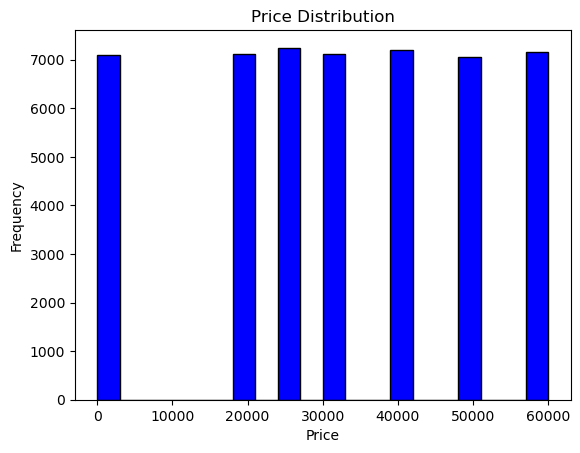

In [14]:
import matplotlib.pyplot as plt

# Plot Price distribution
plt.hist(df["Price"], bins=20, color='blue', edgecolor='black')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

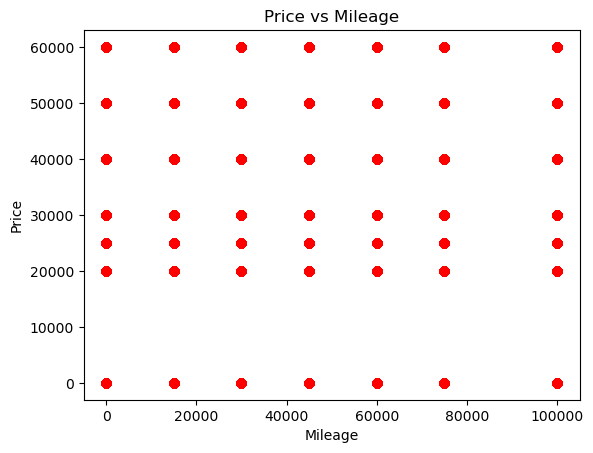

In [15]:
# Scatter plot: Price vs Mileage
plt.scatter(df["Mileage"], df["Price"], alpha=0.5, color='red')
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

# Analyze Relationships

In [16]:
# Manually calculate correlation between Price and Mileage
correlation_price_mileage = df["Price"].corr(df["Mileage"])
print("Correlation between Price and Mileage:", correlation_price_mileage)

# Correlation between Price and Year
correlation_price_year = df["Price"].corr(df["Year"])
print("Correlation between Price and Year:", correlation_price_year)


Correlation between Price and Mileage: 0.002696157089325295
Correlation between Price and Year: 0.0025035095483972895


# Analyze Grouped Data

In [17]:
# Average price by Brand
avg_price_by_brand = df.groupby("Brand")["Price"].mean()
print("Average Price by Brand:")
print(avg_price_by_brand)

# Average mileage by Fuel type
avg_mileage_by_fuel = df.groupby("Fuel")["Mileage"].mean()
print("Average Mileage by Fuel Type:")
print(avg_mileage_by_fuel)


Average Price by Brand:
Brand
BMW        32316.091954
Ford       32315.613027
Honda      32090.966025
Hyundai    32062.061264
Nissan     32141.699092
Tesla      32021.905980
Toyota     32043.666720
Unknown    32267.350158
Name: Price, dtype: float64
Average Mileage by Fuel Type:
Fuel
Diesel          46749.137506
Electric        45927.455919
Hybrid          46212.481426
Petrol          46306.893392
Unknown Fuel    45938.685840
Name: Mileage, dtype: float64


# Prepare Data for Modeling

# Handle Categorical Variables

In [18]:
# Convert categorical columns to numeric codes
df["Brand_Code"] = df["Brand"].astype("category").cat.codes
df["Fuel_Code"] = df["Fuel"].astype("category").cat.codes
df["Location_Code"] = df["Location"].astype("category").cat.codes

In [19]:
# Define predictors and target
X = df[["Year", "Mileage", "Brand_Code", "Fuel_Code"]] # independent
y = df["Price"] # dependent variable

# Predictive Modeling

In [20]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Train a Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 2.26468272e-03  3.93179704e-03 -2.79842177e+01  2.85645397e+01]
Model Intercept: 31991.376148175656


In [ ]:
# y=a+b1(x1)+b2(x2)+b3(x3)+b4(x4)

# Evaluate the Model

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 339334919.3277618
R-squared: -0.00031848987934068873


# Feature Importance

In [23]:
# Analyze which features have the most impact on Price.
# Display feature importance (coefficients)
features = ["Year", "Mileage", "Brand_Code", "Fuel_Code"]
importance = model.coef_

print("Feature Importance:")
for feature, coef in zip(features, importance):
    print(f"{feature}: {coef}")

Feature Importance:
Year: 0.0022646827175819783
Mileage: 0.0039317970409846175
Brand_Code: -27.98421772287313
Fuel_Code: 28.56453971430457


# Save Predictions

In [24]:
# Save the predictions for future use or comparison.
# Save predictions to a new DataFrame
predictions = X_test.copy()
predictions["Actual Price"] = y_test
predictions["Predicted Price"] = y_pred

# Save to a CSV file
predictions.to_csv("car_price_predictions.csv", index=False)

print("Predictions saved to 'car_price_predictions.csv'")


Predictions saved to 'car_price_predictions.csv'


# Clustering Analysis

In [25]:
# Group cars with similar characteristics, such as mileage and price, 
# using k-means clustering.
# Prepare Data for Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
clustering_features = df[["Mileage", "Price"]].fillna(0)  # Replace missing values with 0

# Standardize the data
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

print("Data prepared for clustering.")

Data prepared for clustering.


In [26]:
# Apply K-Means Clustering
# Apply K-Means with 3 clusters (can be changed based on need)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(clustering_features_scaled)

print("Clustering completed. Assigned clusters to each row.")


D:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustering completed. Assigned clusters to each row.


# Visualize Clusters

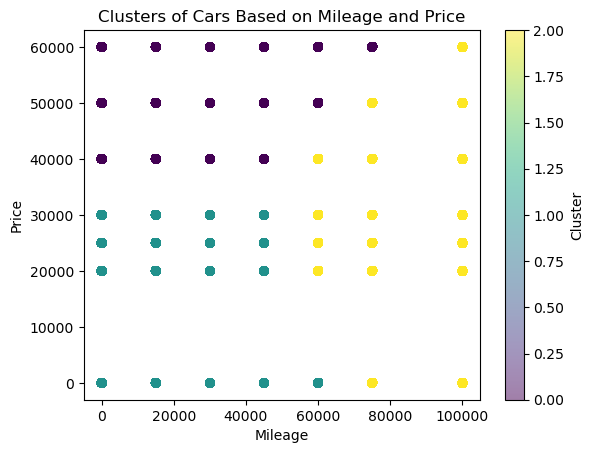

In [27]:
import matplotlib.pyplot as plt

# Scatter plot for clusters
plt.scatter(df["Mileage"], df["Price"], c=df["Cluster"], cmap="viridis", alpha=0.5)
plt.title("Clusters of Cars Based on Mileage and Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.colorbar(label="Cluster")
plt.show()

# Advanced Predictive Modeling with Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")


Random Forest model trained successfully.


# Evaluate Random Forest Performance

In [29]:
# Compare performance with the earlier linear regression model.
# Predict on test data
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest R-squared:", rf_r2)

Random Forest Mean Squared Error: 354356003.4980057
Random Forest R-squared: -0.04459883763516759


# Feature Importance in Random Forest

In [30]:
# Display feature importance
feature_importance = rf_model.feature_importances_

print("Feature Importance (Random Forest):")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance}")


Feature Importance (Random Forest):
Year: 0.26561759043616723
Mileage: 0.24138360674496748
Brand_Code: 0.279932597053119
Fuel_Code: 0.21306620576574636


# Save Enhanced Dataset

In [31]:
# Include cluster and predictions for future use.
# Add predictions and cluster labels to the DataFrame
df["Predicted Price (RF)"] = rf_model.predict(X)
df["Cluster"] = kmeans.predict(clustering_features_scaled)

# Save to a new CSV
df.to_csv("enhanced_car_dataset.csv", index=False)

print("Enhanced dataset saved as 'enhanced_car_dataset.csv'.")


Enhanced dataset saved as 'enhanced_car_dataset.csv'.


# Car Dataset Analysis Report